![title](https://miro.medium.com/max/481/1*cxfqR8NAj8HGal8CVOZ7hg.png)

#  Python Pandas: Tips & Tricks

# #29: Melakukan random sampling pada Data Frame

## Import Modules

- Kode di bawah ini untuk memberi tahu berapa versi pandas kalian

In [1]:
import pandas as pd

print(pd.__version__)

1.1.3


## Persiapan Data Frame

- Data frame di bawah terdiri dari dua buah kolom

In [2]:
d = {'col_1':[1, 2, 3, 4, 5],
     'col_2':[10, 20, 30, 40, 50]}
df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


## Random sampling with/without replacement

- Melakukan proses random sampling dari data frame di atas
- Without replacement artinya data-data yang sudah disampling dari populations itu tidak akan kita sampling lagi
- With replacement artinya data-data yang sudah disampling memiliki kesempatan untuk disampling ulang
- `random_state` akan berkorelasi dengan nilai random state number
- Fungsi utama `random_state` adalah untuk menjamin agar suatu eksperiment itu bisa direplikasi atau bisa dilakukan ulang dengan hasil yang sama persis

In [3]:
df.sample(n=4, replace=False, random_state=0) # without replacement

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [4]:
df.sample(n=4, replace=True, random_state=0) # with replacement

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


# #30: Akses nilai variabel pada query()

## Import Modules

- Kode di bawah ini untuk memberi tahu berapa versi pandas dan numpy kalian

In [5]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.1.3
1.19.2


## Persiapan Data Frame

- Membentuk Data Frame sederhana yang terdiri dari 5 baris dan 5 kolom

In [6]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,19,19,14,5,18
1,7,12,18,1,17
2,11,8,4,11,16
3,5,8,6,8,10
4,19,16,8,17,8


## Akses nilai variabel pada query()

- Metode `query` digunakan untuk melakukan seleksi baris
- Fungsi ` @` adalah untuk mengakses nilai yang ditampung dalam suatu variabel

In [7]:
df.query('A > 5') # nilai dari kolom A yang lebih besar dari 5

,A,B,C,D,E
0,19,19,14,5,18
1,7,12,18,1,17
2,11,8,4,11,16
4,19,16,8,17,8


In [9]:
rerata = df['A'].mean() # nilai mean dari kolom A
rerata

12.2

In [10]:
df.query('A > @rerata') # nilai dari kolom A yang hanya diatas nilai rata-ratanya

,A,B,C,D,E
0,19,19,14,5,18
4,19,16,8,17,8


# #31: Mengenal tipe data ordinal pada Pandas

## Import Modules

- Kode di bawah ini untuk memberi tahu berapa versi pandas kalian

In [11]:
import pandas as pd

print(pd.__version__)

1.1.3


## Persiapan Data Frame

In [12]:
d = {'pelanggan':[11, 12, 13, 14],
     'kepuasan':['baik', 'cukup', 'buruk', 'cukup']}
df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


## Tipe data ordinal pada Pandas

- `tingkat_kepuasan` adalah tipe data ordinal

In [14]:
from pandas.api.types import CategoricalDtype

tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'],
                                    ordered=True)

df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [15]:
df = df.sort_values('kepuasan', ascending=True)
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [16]:
df[df['kepuasan']> 'cukup'] # seleksi baris

,pelanggan,kepuasan
0,11,baik


# #32: Plotting dari suatu Pandas Data Frame

## Import Modules

- Kode di bawah ini untuk memberi tahu berapa versi pandas dan numpy kalian

In [17]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.1.3
1.19.2


## Persiapan Data Frame

In [18]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)),
                  columns=cols)
df.head()

,A,B,C,D,E
0,18,11,1,1,6
1,12,6,5,10,7
2,16,4,6,7,1
3,16,7,17,13,18
4,17,9,17,6,17


## Line Plot

In [19]:
df.head() # isi data frame di atas

,A,B,C,D,E
0,18,11,1,1,6
1,12,6,5,10,7
2,16,4,6,7,1
3,16,7,17,13,18
4,17,9,17,6,17


- Memplotting untuk keseluruh kolom

<AxesSubplot:>

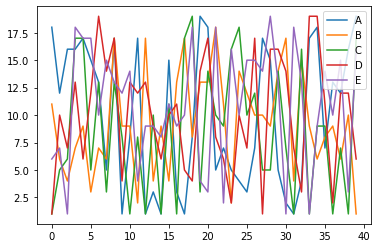

In [20]:
df.plot(kind='line') 

- Melakukakn plotting pada kolom-kolom tertentu saja

<AxesSubplot:>

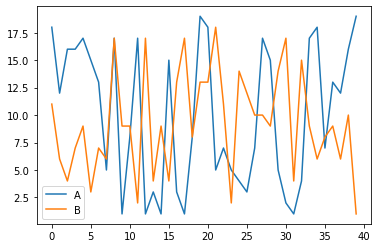

In [21]:
df[['A', 'B']].plot(kind='line') 

##  Bar Plot

In [22]:
df.head()

,A,B,C,D,E
0,18,11,1,1,6
1,12,6,5,10,7
2,16,4,6,7,1
3,16,7,17,13,18
4,17,9,17,6,17


- Melakukan plotting bar plot 

<AxesSubplot:>

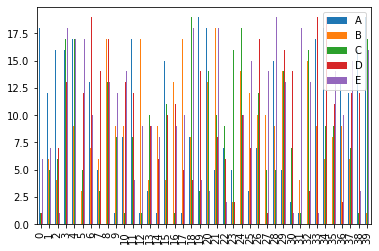

In [23]:
df.plot(kind='bar')

- Menyederhanakan tampilan dengan memfokuskan pada dua kolom saja

<AxesSubplot:>

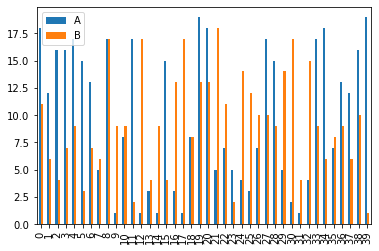

In [24]:
df[['A', 'B']].plot(kind='bar')

- Menyederhanakan tampilan dengan menampilkan data 5 baris pertama saja

<AxesSubplot:>

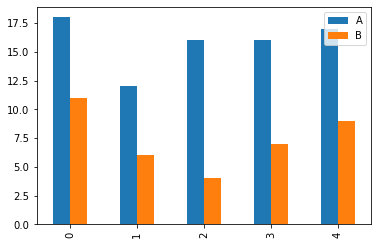

In [25]:
df[['A', 'B']].head().plot(kind='bar')

- Bar plot secara horizontal

<AxesSubplot:>

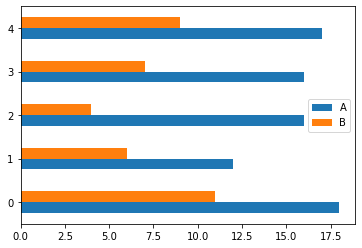

In [26]:
df[['A', 'B']].head().plot(kind='barh')

## Area Plot

In [27]:
df.head()

,A,B,C,D,E
0,18,11,1,1,6
1,12,6,5,10,7
2,16,4,6,7,1
3,16,7,17,13,18
4,17,9,17,6,17


- Menggunakan area plot

<AxesSubplot:>

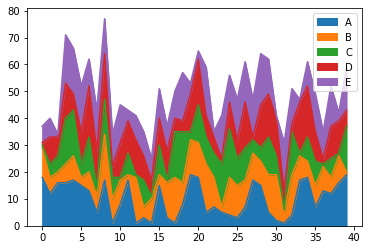

In [28]:
df.plot(kind='area')

- Menyederhanakan tampilan dengan menyoroti kolom A dan B saja

<AxesSubplot:>

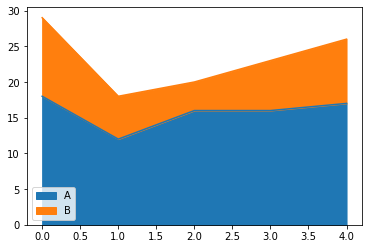

In [29]:
df[['A', 'B']].head().plot(kind='area')

## Box Plot

In [30]:
df.head()

,A,B,C,D,E
0,18,11,1,1,6
1,12,6,5,10,7
2,16,4,6,7,1
3,16,7,17,13,18
4,17,9,17,6,17


- Memvisualisasikan secara box plot

<AxesSubplot:>

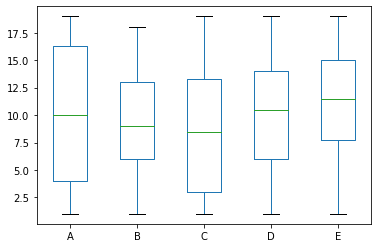

In [31]:
df.plot(kind='box')

## Histogram

In [32]:
df.head()

,A,B,C,D,E
0,18,11,1,1,6
1,12,6,5,10,7
2,16,4,6,7,1
3,16,7,17,13,18
4,17,9,17,6,17


- Memvisualisasikan secara histogram

<AxesSubplot:ylabel='Frequency'>

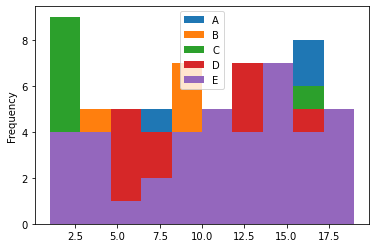

In [33]:
df.plot(kind='hist')

- Menyederhanakan tampilan dengan menyoroti kolom A dan B saja

<AxesSubplot:ylabel='Frequency'>

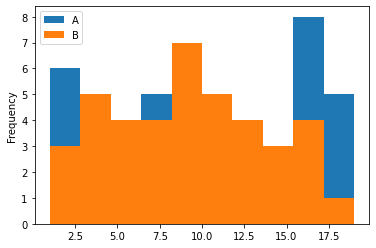

In [34]:
df[['A', 'B']].plot(kind='hist')

## Kernel Density Estimation (KDE)

In [35]:
df.head()

,A,B,C,D,E
0,18,11,1,1,6
1,12,6,5,10,7
2,16,4,6,7,1
3,16,7,17,13,18
4,17,9,17,6,17


- Memvisualisasikan secara KDE

<AxesSubplot:ylabel='Density'>

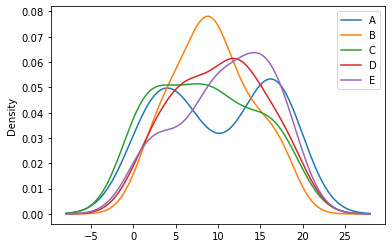

In [36]:
df.plot(kind='kde')

## Scatter Plot

In [37]:
df.head()

,A,B,C,D,E
0,18,11,1,1,6
1,12,6,5,10,7
2,16,4,6,7,1
3,16,7,17,13,18
4,17,9,17,6,17


- Memvisualisasikan secara Scatter Plot

<AxesSubplot:xlabel='A', ylabel='B'>

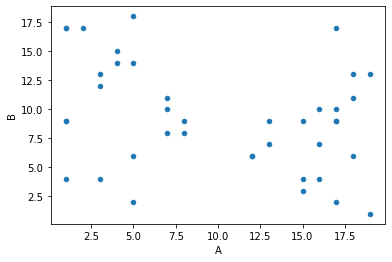

In [38]:
df.plot(x='A', y='B', kind='scatter')